## ウイルス分布　評価 その2
---
その1で作成したcheckpointファイルを読み込み、モデルの評価を行う

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

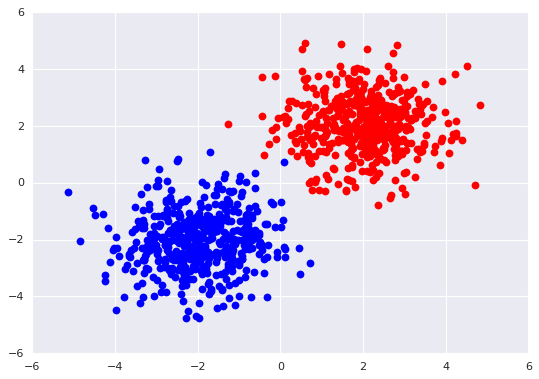

In [2]:
x_positive = np.random.randn(500,1) + 2
y_positive = np.random.randn(500,1) + 2
x_negative = np.random.randn(500,1) - 2
y_negative = np.random.randn(500,1) - 2

plt.figure(1)
plt.plot(x_positive, y_positive, 'ro', label='Data')
plt.plot(x_negative, y_negative, 'bo', label='Data')
plt.show()

## 学習モデルの作成に使用した変数を定義する
予測用のOperationを追加

In [3]:
#入力層
x = tf.placeholder(tf.float32, shape=(None,2), name="input")
t = tf.placeholder(tf.float32, shape=(None,2))
w = tf.Variable(tf.random_normal([2,2], stddev=0.01), dtype=tf.float32, name="weight")
b = tf.Variable(tf.random_normal([2], stddev=0.01), dtype=tf.float32, name="bias")

# ロジスティック回帰のモデルを定義
with tf.name_scope('output'):
  y_pred = tf.nn.softmax(tf.matmul(x,w) + b, name="output")

# コストの計算
with tf.name_scope('cost'):
  loss = tf.nn.softmax_cross_entropy_with_logits(labels=t,logits=y_pred)
  cost = tf.reduce_mean(loss)

# 追加の予測オペレーション
with tf.name_scope('predict'):
  predict_op = tf.argmax(y_pred, 1)
# トレーニング
learning_rate = 0.01
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 学習モデルの読み込み

In [4]:
CKPT_PATH = './virus-ckpt'
CKPT_DIR = 'virus-ckpt'

# 学習済みモデルの保存準備
saver = tf.train.Saver()

with tf.Session() as sess:
  # 学習済みモデルのcheckpointファイルがあるかどうか
  ckpt = tf.train.get_checkpoint_state(CKPT_PATH)
  if ckpt:
    # checkpointファイルから最後に保存したモデルへのパスを取得する
    last_model = ckpt.model_checkpoint_path
    print("load " + last_model)
    # 学習済みモデルを読み込む
    saver.restore(sess, last_model)
    
    # check anser
    data = [[4,2]]
    x_check = np.array(data)
    flag_pos = sess.run(predict_op, feed_dict={x: x_check})
    print "flag position is %d" % (flag_pos)
    data = [[2,2]]
    x_check = np.array(data)
    flag_pos = sess.run(predict_op, feed_dict={x: x_check})
    print "flag position is %d" % (flag_pos)
    data = [[-4,-4]]
    x_check = np.array(data)
    flag_pos = sess.run(predict_op, feed_dict={x: x_check})
    print "flag position is %d" % (flag_pos)
  else:
    print("No checkpoint file")

load ./virus-ckpt/virus-model
INFO:tensorflow:Restoring parameters from ./virus-ckpt/virus-model
flag position is 1
flag position is 1
flag position is 0


positiveの正解ラベルは[0,1]、結果(argmax)としては1が返ってくる。  
negativeの正解ラベルは[1,0]、結果(argmax)としては0が返ってくる。 